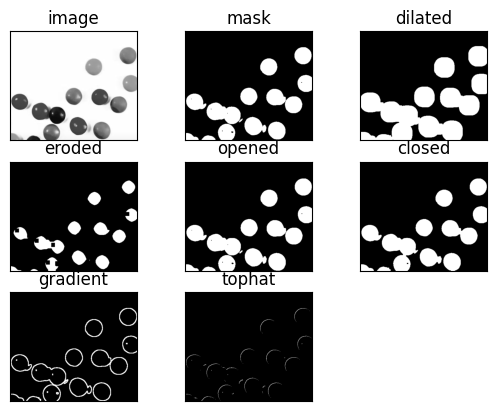

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('smarties.jpg', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)


kernal = np.ones((4,4), np.uint8)
#dilation
#kernal travels through image. If at least one pixel under the kernal is foreground,
#every pixel under the kernel is set to foreground
dilation = cv2.dilate(mask, kernal, iterations = 4)
#erosion
#kernal travels through image. If every pixel in the kernal (4 x 4) for example is foreground,
#then that pixel is set to background. Thus the borders of foreground are eroded.
erosion = cv2.erode(mask, kernal, iterations = 4)

#first erosion then dilation in opening
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernal)
#first dilation then erosion in closing
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernal)

#morphological gradient
#the difference between the dilation and erosion of an image
mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernal)
#tophat
#difference between the image and the opening of that image
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernal)


#there are many more cv2.MORPH_{}


titles = ['image','mask', 'dilated','eroded', 'opened', 'closed', 'gradient', 'tophat']
images = [img,mask,dilation,erosion, opening, closing, mg, th]

for i in range(8):
    plt.subplot(3,3,i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])